Movie Database Analysis by Nicolle Ho

In [1]:
#Ask Questions

This report analyzes the tmbd-movies database. The purpose of the analysis is to gain insight into movie popularity. What are the attributes that are associated with movies that are popular?

In [2]:
#Wrangle Data

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MaxNLocator
from collections import namedtuple

In [4]:
#Read Database
df = pd.read_csv("tmdb-movies.csv")
df.head()
df.shape

(10866, 21)

In [5]:
#Check for missing values
df.isnull()
df.isnull().sum()
#below there are missing values for several fields 

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [6]:
#Dont need to drop null items because the fields we are analyzing do not have nulls
#df = df.dropna()
#df.isnull().sum()

In [7]:
#check for duplicate rows 
df = df.drop_duplicates(keep = 'first')
#values return false so it is not a duplicate row

In [8]:
#check for unique responses to see if there are hidden trues
df.duplicated(keep='first').nunique()
#only one unique response, so all values are False (not duplicated)

1

In [9]:
#check data types
df.dtypes
#the object data types have many values separated by | so this requires more cleaning

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

count    10865.000000
mean         0.646446
std          1.000231
min          0.000065
25%          0.207575
50%          0.383831
75%          0.713857
max         32.985763
Name: popularity, dtype: float64


Text(0, 0.5, 'Count')

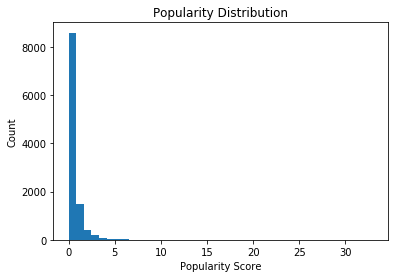

In [10]:
#Determine distribution of popularity and check for outliers
print(df['popularity'].describe())
pop = df['popularity']
n, bins, patches = plt.hist(x=pop, bins=40)
plt.title('Popularity Distribution')
plt.xlabel('Popularity Score')
plt.ylabel('Count')

This graph shows how popularity scores are distributed across 10866 movies. The popularity scores are skewed right, so there are fewer movies that are popular. This is intuitive. We can also see that there are several outliers in the upperbound. There are several movies that are much more popular than the rest of the movies. 

Text(0.5, 0, 'Popularity Score')

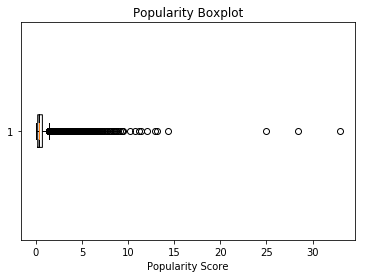

In [11]:
#Boxplot to view distribution and check for outliers
fig1, ax1 = plt.subplots()
ax1.set_title('Popularity Boxplot')
ax1.boxplot(pop, vert = False, notch = True)
ax1.set_xlabel('Popularity Score')
#Another view to show that popularity is skewed right
#Popularity scores are concentrated on the lower end

This boxplot is another view of how popularity is distributed across all the movies. This view is interesting because we can see where are the quartiles. The first three quartiles are very concentrated in the lower popularity score region. The last quartile has the largest range. This confirms that the majority of movies are not popular. There is high variability in popularity for the popular movies. Because of these large outliers and variation, both the high and the low outliers will be excluded from the rest of the analysis. 

In [13]:
#subset of the inner 50% to remove outliers
df2 = df.loc[(df.popularity > 0.384079) & (df.popularity < 1.538639)]
df2.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
104,188222,tt1674771,1.532997,30000000,49263404,Entourage,Jeremy Piven|Adrian Grenier|Jerry Ferrara|Kevi...,NaN,Doug Ellin,Dream Large. Live Larger.,...,"Movie star Vincent Chase, together with his bo...",104,Comedy,Warner Bros.|Closest to the Hole Productions,6/3/15,364,6.2,2015,2.759999e+07,4.532231e+07
105,252838,tt0884732,1.510096,23000000,79799880,The Wedding Ringer,Kevin Hart|Josh Gad|Kaley Cuoco|Affion Crocket...,NaN,Jeremy Garelick,He's the best man... money can buy.,...,Doug Harris is a loveable but socially awkward...,101,Comedy,Miramax Films|Screen Gems|LStar Capital,1/16/15,446,6.5,2015,2.115999e+07,7.341586e+07
106,273477,tt1727776,1.499614,15000000,14860766,Scouts Guide to the Zombie Apocalypse,Tye Sheridan|Logan Miller|Joey Morgan|Sarah Du...,http://www.scoutsandzombiesmovie.com/,Christopher B. Landon,Always bring protection.,...,Three scouts and lifelong friends join forces ...,93,Comedy|Horror,Paramount Pictures|Oops Doughnuts Productions|...,10/23/15,288,6.2,2015,1.379999e+07,1.367190e+07
107,298312,tt3567288,1.495112,5000000,98450062,The Visit,Olivia DeJonge|Ed Oxenbould|Kathryn Hahn|Benja...,http://www.stayinyourroom.com/,M. Night Shyamalan,No one loves you like your grandparents.,...,The terrifying story of a brother and sister w...,94,Horror|Thriller,Blumhouse Productions|Blinding Edge Pictures,9/10/15,729,5.9,2015,4.599998e+06,9.057402e+07
108,261023,tt1355683,1.483246,53000000,99775678,Black Mass,Johnny Depp|Joel Edgerton|Benedict Cumberbatch...,NaN,Scott Cooper,Keep your enemies close.,...,"The true story of Whitey Bulger, the brother o...",122,Crime|Drama,Infinitum Nihil|Head Gear Films|Cross Creek Pi...,9/4/15,848,6.3,2015,4.875998e+07,9.179358e+07


count    4540.000000
mean        0.722664
std         0.292626
min         0.384097
25%         0.481688
50%         0.630672
75%         0.906316
max         1.538276
Name: popularity, dtype: float64


Text(0, 0.5, 'Count')

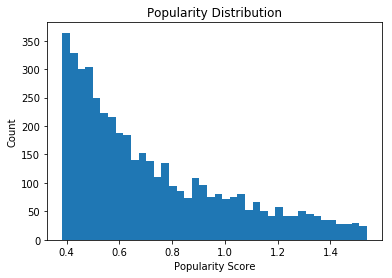

In [14]:
#Determine popularity distribution of inner 50%
print(df2['popularity'].describe())
pop2 = df2['popularity']
n, bins, patches = plt.hist(x=pop2, bins=40)
plt.title('Popularity Distribution')
plt.xlabel('Popularity Score')
plt.ylabel('Count')
#There are fewer movies that are highly popular
#this is intuitive because most movies are not popular

When examining the inner 50%, we can see that there is negative linear relationship between popularity score and count. The more popular a movie is, fewer movies exist with that level of popularity. 

count    4540.000000
mean        0.722664
std         0.292626
min         0.384097
25%         0.481688
50%         0.630672
75%         0.906316
max         1.538276
Name: popularity, dtype: float64


{'whiskers': [<matplotlib.lines.Line2D at 0x1140c5550>,
 'caps': [<matplotlib.lines.Line2D at 0x1140c5be0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1140c5160>],
 'medians': [<matplotlib.lines.Line2D at 0x1141822b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1141825f8>],
 'means': []}

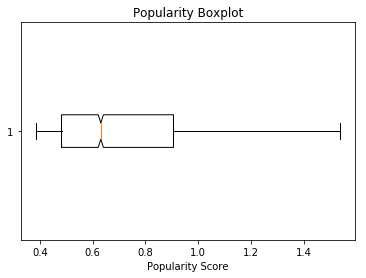

In [16]:
#Boxplot to view distribution and check for outliers
print(df2['popularity'].describe())
fig1, ax1 = plt.subplots()
ax1.set_title('Popularity Boxplot')
ax1.set_xlabel('Popularity Score')
ax1.boxplot(pop2, vert = False, notch = True)
#There are fewer movies that are highly popular
#this is intuitive because most movies are not popular

This is a boxplot view of the inner 50%. The median popularity score is 0.63. Each quartile increases in size, which confirms that popularity is skewed right. 

In [17]:
#Exploratory Data Analysis

In [19]:
#Remove erroneous zero budget / revenue values
df2 = df[(df.budget_adj != 0) & (df.revenue_adj != 0)]

In [21]:
#Split the data into quintiles by popularity to see how groups behave on average
df2['quantile'] = pd.qcut(df2['popularity'],5,labels=["Q1","Q2","Q3","Q4","Q5"])
df2.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,quantile
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Q5
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,Q5
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,Q5
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,Q5
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,Q5


In [23]:
#confirm that errous zero budget / revenue movies were removed 
df2 = df2.sort_values(by='budget_adj')
df2.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,quantile
3581,59296,tt1436559,0.520430,1,1378,"Love, Wedding, Marriage",Mandy Moore|Kellan Lutz|Jessica Szohr|Autumn F...,http://www.ifcfilms.com/films/love-wedding-mar...,Dermot Mulroney,Here comes the ride.,...,90,Comedy|Romance,120dB Films|Scion Films|Voodoo Production Serv...,6/3/11,55,5.3,2011,0.969398,1335.830503,Q2
2618,39964,tt0120836,0.090186,1,100,Lost & Found,David Spade|Sophie Marceau|Ever Carradine|Step...,NaN,Jeff Pollack,A comedy about a guy who would do anything to ...,...,95,Comedy|Romance,Alcon Entertainment|Dinamo Entertainment,4/23/99,14,4.8,1999,1.309053,130.905285,Q1
2398,39356,tt1560139,0.028456,3,43,Boy,James Rolleston|Craig Hall|Taika Waititi|Te Ah...,http://www.boythemovie.co.nz,Taika Waititi,"Summer, Girls, Gangs, Drugs ... its not easy b...",...,87,Drama|Comedy,New Zealand Film Commission|Unison Films|Whenu...,2/14/10,26,7.3,2010,3.000000,43.000000,Q1
8944,14373,tt0082250,0.464188,2,16,Death Wish 2,Charles Bronson|Jill Ireland|Vincent Gardenia|...,NaN,Michael Winner,First His Wife. Now His Daughter. It's Time To...,...,88,Action|Crime|Thriller,Cannon Films,2/20/82,27,5.6,1982,4.519285,36.154278,Q2
10050,20701,tt0100740,0.317091,3,16,Tales from the Darkside: The Movie,Rae Dawn Chong|Christian Slater|Deborah Harry|...,NaN,John Harrison,From the depths of four twisted minds.,...,93,Fantasy|Horror|Comedy,Paramount Pictures|Laurel Productions|Darkside...,5/3/90,37,5.8,1990,5.006696,26.702377,Q1


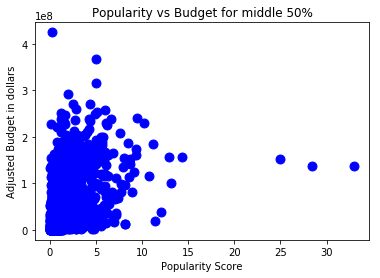

In [24]:
#Plot popularity vs budget non outlier movies
plt.title("Popularity vs Budget for middle 50%")
plt.xlabel("Popularity Score")
plt.ylabel("Adjusted Budget in dollars")
plt.scatter(df2['popularity'], df2['budget_adj'], s=80, c='b', marker="o")
#Difficult to see a trend between popularity and budget

We are plotting popularity vs budget to try to determine a relationship. However because of the numerous and cluttered data points it is difficult to see a clear trend. 

In [25]:
#Calculate average budget and revenue for each quintile
budget = df2.groupby('quantile')['budget_adj'].mean()
revenue = df2.groupby('quantile')['revenue_adj'].mean()

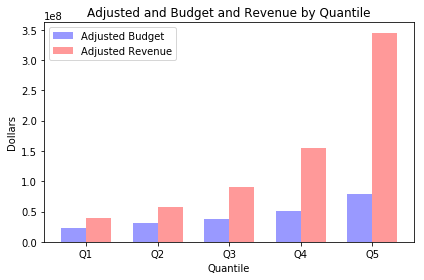

In [27]:
n_groups = 5

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = ax.bar(index, budget, bar_width,
                alpha=opacity, color='b', error_kw=error_config,
                label='Adjusted Budget')

rects2 = ax.bar(index + bar_width, revenue, bar_width,
                alpha=opacity, color='r', error_kw=error_config,
                label='Adjusted Revenue')

ax.set_xlabel('Quantile')
ax.set_ylabel('Dollars')
ax.set_title('Adjusted and Budget and Revenue by Quantile')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('Q1', 'Q2', 'Q3', 'Q4', 'Q5'))
ax.legend()

fig.tight_layout()
plt.show()

We can see trends more clearly when data is split into quantiles. More popular movies have larger budgets than less popular movies. More popular movies generate larger revenues than less popular movies. 

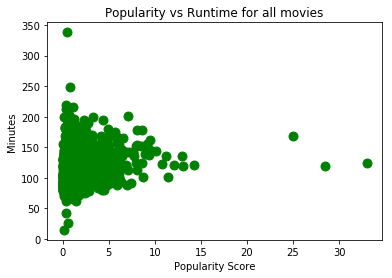

In [28]:
#Popularity vs Runtime for all movies
plt.title("Popularity vs Runtime for all movies")
plt.xlabel("Popularity Score")
plt.ylabel("Minutes")
plt.scatter(df2['popularity'], df2['runtime'], s=80, c='g', marker="o")
#There are two outliers -- two movies that are really long

Popularity is plotted against runtime to try and determine a relationship. The trend is unclear because of the concentration of data points on the left hand side of the graph. 

In [29]:
#Sort the values by runtime to determine outliers which is the 338 min movie
df2 = df2.sort_values(by='runtime')
df2.tail()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,quantile
5065,16072,tt0279111,0.469518,56000000,12923936,Gods and Generals,Stephen Lang|Jeff Daniels|Robert Duvall|Kevin ...,NaN,Ronald F. Maxwell,The nations heart was touched by...,...,214,Drama|History|War,Turner Pictures|Antietam Filmworks,2/21/03,23,5.8,2003,6.637975e+07,1.531942e+07,Q2
9850,947,tt0056172,1.168767,15000000,70000000,Lawrence of Arabia,Peter O'Toole|Alec Guinness|Anthony Quinn|Jack...,NaN,David Lean,A Mighty Motion Picture Of Action And Adventure!,...,216,Adventure|Drama|History|War,Horizon Pictures (II),12/10/62,517,7.5,1962,1.081267e+08,5.045914e+08,Q4
7332,10935,tt0080855,0.418950,44000000,3484331,Heaven's Gate,Kris Kristofferson|Christopher Walken|John Hur...,NaN,Michael Cimino,The only thing greater than their passion for ...,...,219,Action|Drama|History|Western,United Artists,11/19/80,18,6.0,1980,1.164256e+08,9.219668e+06,Q2
10443,8095,tt0056937,0.804533,31115000,57750000,Cleopatra,Elizabeth Taylor|Richard Burton|Rex Harrison|R...,NaN,Joseph L. Mankiewicz|Rouben Mamoulian|Darryl F...,The motion picture the world has been waiting ...,...,248,Drama|History|Romance,Twentieth Century Fox Film Corporation|MCL Fil...,6/12/63,68,6.3,1963,2.215444e+08,4.111904e+08,Q3
2107,43434,tt1321865,0.534192,18000000,871279,Carlos,Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...,NaN,Olivier Assayas,The man who hijacked the world,...,338,Crime|Drama|Thriller|History,Egoli Tossell Film AG|Canal+|Arte France|Films...,5/19/10,35,6.2,2010,1.800000e+07,8.712790e+05,Q2


In [30]:
#Drop runtime outliers
df2 = df2[(df2.runtime < 337)]
df2.tail()
#338 runtime values were dropped 

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,quantile
3110,14073,tt0449994,0.389554,8376800,13000000,Jodhaa Akbar,Hrithik Roshan|Aishwarya Rai Bachchan|Sonu Soo...,http://www.jodhaaakbar.com/,Ashutosh Gowariker,NaN,...,213,Action|Adventure|Drama|Foreign|History,UTV Motion Pictures|Ashutosh Gowariker Product...,2/15/08,48,7.8,2008,8.483911e+06,1.316623e+07,Q1
5065,16072,tt0279111,0.469518,56000000,12923936,Gods and Generals,Stephen Lang|Jeff Daniels|Robert Duvall|Kevin ...,NaN,Ronald F. Maxwell,The nations heart was touched by...,...,214,Drama|History|War,Turner Pictures|Antietam Filmworks,2/21/03,23,5.8,2003,6.637975e+07,1.531942e+07,Q2
9850,947,tt0056172,1.168767,15000000,70000000,Lawrence of Arabia,Peter O'Toole|Alec Guinness|Anthony Quinn|Jack...,NaN,David Lean,A Mighty Motion Picture Of Action And Adventure!,...,216,Adventure|Drama|History|War,Horizon Pictures (II),12/10/62,517,7.5,1962,1.081267e+08,5.045914e+08,Q4
7332,10935,tt0080855,0.418950,44000000,3484331,Heaven's Gate,Kris Kristofferson|Christopher Walken|John Hur...,NaN,Michael Cimino,The only thing greater than their passion for ...,...,219,Action|Drama|History|Western,United Artists,11/19/80,18,6.0,1980,1.164256e+08,9.219668e+06,Q2
10443,8095,tt0056937,0.804533,31115000,57750000,Cleopatra,Elizabeth Taylor|Richard Burton|Rex Harrison|R...,NaN,Joseph L. Mankiewicz|Rouben Mamoulian|Darryl F...,The motion picture the world has been waiting ...,...,248,Drama|History|Romance,Twentieth Century Fox Film Corporation|MCL Fil...,6/12/63,68,6.3,1963,2.215444e+08,4.111904e+08,Q3


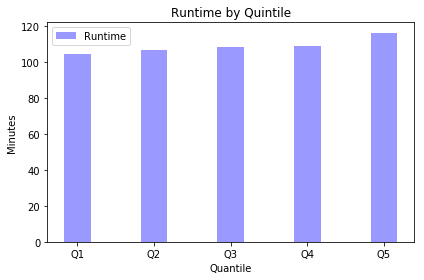

quantile
Q1    104.795071
Q2    106.976623
Q3    108.609091
Q4    109.002594
Q5    116.417639
Name: runtime, dtype: float64

In [31]:
#Runtime by quintile
runtime = df2.groupby('quantile')['runtime'].mean()

n_groups = 5

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = ax.bar(index+bar_width/2, runtime, bar_width,
                alpha=opacity, color='b', error_kw=error_config,
                label='Runtime')

ax.set_xlabel('Quantile')
ax.set_ylabel('Minutes')
ax.set_title('Runtime by Quintile')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('Q1', 'Q2', 'Q3', 'Q4', 'Q5'))
ax.legend()
fig.tight_layout()
plt.show()
runtime

Breaking the data into quintiles allows us to view the data more clearly. All the bar heights are approximately the same size, so there does not appear to be a relationship between runtime and movie popularity. 

In [32]:
df2['genres']
df2['genres'] = df2['genres'].str.split('|')
df2.groupby('quantile')['genres'].apply(list)

quantile
Q1    [[Science Fiction, Animation], [Adventure, Act...
Q2    [[Family, Animation], [Music, Animation, Famil...
Q3    [[Adventure, Fantasy, Animation, Family], [Wes...
Q4    [[Animation, Family], [Drama, Music, Romance],...
Q5    [[Family, Animation, Adventure], [Fantasy, Ani...
Name: genres, dtype: object

In [33]:
df2['genres'].values.reshape(-1)

array([list(['Science Fiction', 'Animation']),
       list(['Family', 'Animation']),
       list(['Adventure', 'Action', 'Comedy', 'Science Fiction', 'Music']),
       ..., list(['Adventure', 'Drama', 'History', 'War']),
       list(['Action', 'Drama', 'History', 'Western']),
       list(['Drama', 'History', 'Romance'])], dtype=object)

In [34]:
df2.shape

(3853, 22)

In [ ]:
#Draw Conclusions

This report analyzes attributes of popular movies. 

The dataset is rich and sufficient for gaining greater insight into which factors are related to movie popularity. The original dataset had 10866 observations (movies) and 21 fields that include budget, revenue, runtime, genre, etc. After creating a subset of the inner 50% based on popularity and dropping movies with zero budget / revenue, the final analyzed dataset had 3853 observations and 22 fields (added quintile field). The dataset posed additional challenges because fields such as genre and production company had several attributes separated by |. This will require additional data cleaning and analytical reflection as some movies are listed as multiple genres. 

More popular movies (higher quintiles) have higher average budgets and average revenues than less popular movies movies in (lower quintiles). There is no obvious relationship between runtime and movie popularity. Next steps of analysis include investigating how genres, production companies, acting casts, and directors contribute to movie popularity. 